In this file, the goal is to compute the chamfer distance with a kernel weight according to the fact that each voxel is far or close to the mask boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [2]:
from scipy.stats import ks_2samp, wasserstein_distance, cramervonmises_2samp

In [3]:
mask= np.load("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/crops/2mm/S.C.-sylv./mask/Rmask.npy")

In [4]:
mask.shape

(42, 34, 49, 1)

In [5]:
mask= mask[:,:,:,0]
mask.shape

(42, 34, 49)

In [6]:
input=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/inputs.npy", mmap_mode='r')
output=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/outputs.npy", mmap_mode='r')

In [7]:
input=input[:,0,:,:,:]

In [8]:
output1=output[:,1,:,:,:]

In [9]:
input.shape

(42433, 52, 40, 56)

In [10]:
mask = mask.astype(int)

In [11]:
target_shape = input[0].shape

pad_width = [(0, t - s) for s, t in zip(mask.shape, target_shape)]

mask = np.pad(mask, pad_width, mode='constant', constant_values=0)
mask.shape

(52, 40, 56)

In [12]:
Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Reconstruction_error.csv")

In [13]:
Reconstruc_error_UKB

,Unnamed: 0,0
0,1000021,2717.726562
1,1000325,2951.913086
2,1000458,3319.848145
3,1000575,2960.276855
4,1000606,3075.081299
...,...,...
42428,6023847,2892.883789
42429,6024038,3244.373535
42430,6024150,2642.636963
42431,6024379,2866.343750


In [14]:
Reconstruc_error_UKB  = Reconstruc_error_UKB.rename(columns={Reconstruc_error_UKB.columns[0]: "ID"}) #to rename the first column

In [15]:
Reconstruc_error_UKB['ID'] = 'sub-' + Reconstruc_error_UKB['ID'].astype(str)

In [16]:
Reconstruc_error_UKB

,ID,0
0,sub-1000021,2717.726562
1,sub-1000325,2951.913086
2,sub-1000458,3319.848145
3,sub-1000575,2960.276855
4,sub-1000606,3075.081299
...,...,...
42428,sub-6023847,2892.883789
42429,sub-6024038,3244.373535
42430,sub-6024150,2642.636963
42431,sub-6024379,2866.343750


In [17]:
label_cs= pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/CSLabel/interrupted_CS_QC.csv")

In [18]:
label_cs

,ID,Note
0,sub-1376904,OK
1,sub-3694216,OK
2,sub-1037052,OK
3,sub-3250551,"C.S. in the right of the mask, partially out"
4,sub-5401486,OK
...,...,...
267,sub-4549003,OK
268,sub-1915832,OK
269,sub-3031778,OK
270,sub-4665000,OK


In [19]:
interrupted_cs= label_cs[label_cs["Note"]=="OK"]

In [20]:
interrupted_cs

,ID,Note
0,sub-1376904,OK
1,sub-3694216,OK
2,sub-1037052,OK
4,sub-5401486,OK
5,sub-1499791,OK
...,...,...
266,sub-1719698,OK
267,sub-4549003,OK
268,sub-1915832,OK
269,sub-3031778,OK


In [21]:
indexes = Reconstruc_error_UKB[Reconstruc_error_UKB['ID'].isin(interrupted_cs['ID'])].index #To find the index of rows in Reconstruct_error_UKB with ID in interrupted_cs


In [22]:
indexes

Index([   94,   267,   457,   773,   863,   885,  1075,  1088,  1261,  1280,
       ...
       40359, 40756, 40875, 40913, 41694, 41739, 41787, 41823, 42098, 42170],
      dtype='int64', length=207)

In [23]:
mask1 = np.zeros(input.shape[0], dtype=bool)  # tableau de booléens
mask1[indexes] = True  # True pour les indices dans indexes

input_UKB_interrupted_cs = input[mask1]       
input_UKB= input[~mask1]   

output_UKB_interrupted_cs = output1[mask1]       
output_UKB= output1[~mask1]   

In [24]:
input_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/inputs.npy")
output_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/outputs.npy")

input_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/inputs.npy")
output_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/outputs.npy")

In [25]:
output1_hcp=output_hcp[:,1,:,:,:]
output1_epilepsy=output_epilepsy[:,1,:,:,:]

In [26]:
index_irm_neg = [19,21,26,28,31,34,35,38,40,41,43,44,45]
index_irm_pos=[20,22,23,24,25,27,29,30,32,33,36,37,39,42,46,47,48,49,50,51,52,53,54,55,56]

In [27]:
input_hcp=input_hcp[:,0,:,:,:]
input_epilepsy=input_epilepsy[:,0,:,:,:]

In [28]:
input_control= input_epilepsy[0:19,:,:,:]
output_control= output1_epilepsy[0:19,:,:,:]

input_neg= input_epilepsy[index_irm_neg,:,:,:]
output_neg= output1_epilepsy[index_irm_neg,:,:,:]

input_pos= input_epilepsy[index_irm_pos,:,:,:]
output_pos= output1_epilepsy[index_irm_pos,:,:,:]

Chamfer distance

In [29]:
from scipy.ndimage import distance_transform_edt

In [30]:
def edge_distance_kernel(mask, distance_threshold=5.0, sigma=2.0):
    """
    Compute a spatial weighting kernel emphasizing the center of a binary mask.
    Inside the mask:
      - Weights = 1 for pixels farther than `distance_threshold` from the edge.
      - Weights = Gaussian decay for pixels within `distance_threshold` of the edge.
    Outside the mask:
      - Weights = 0.
    Parameters
    ----------
    mask : np.ndarray
        2D or 3D binary mask defining the valid region (1 inside, 0 outside).
    distance_threshold : float
        Distance (in pixels/voxels) from the mask edge above which weight = 1.
    sigma : float
        Gaussian falloff width (controls how fast the weight decays near edges).
    Returns
    -------
    kernel : np.ndarray
        Weight map of same shape as `mask`, values in [0,1].
    """
    assert mask.ndim in (2, 3), "mask must be 2D or 3D"
    mask = (mask > 0).astype(np.uint8)
    # Compute distance to the nearest 0 (edge)
    dist_inside = distance_transform_edt(mask)
    # Gaussian decay near the edge
    kernel = np.ones_like(mask, dtype=float)
    near_edge = dist_inside < distance_threshold
    kernel[near_edge] = np.exp(-((distance_threshold - dist_inside[near_edge]) ** 2) / (2 * sigma ** 2))
    # Zero weight outside the mask
    kernel[mask == 0] = 0.0
    return kernel

In [31]:
def chamfer_sweep_weighted(
    binary,
    reconstruction,
    threshold,
    kernel=None,
    two_sided=True
):
    """
    Compute weighted Chamfer distance between a binary mask and thresholded
    reconstructions over a range of thresholds.
    Parameters
    ----------
    binary : np.ndarray
        2D or 3D binary ground truth (0/1).
    reconstruction : np.ndarray
        2D or 3D continuous reconstruction in [0,1].
    kernel : np.ndarray or None
        Weighting map of same shape as input. If None, use uniform weights = 1.
    two_sided : bool
        Whether to compute symmetric Chamfer (True) or one-sided (False).
    local_window : int or None
        If None, returns mean error per threshold (scalar).
        If int, compute the sum of weighted error in each valid window
        (no padding) and take the maximum as the score.
    """
    assert binary.shape == reconstruction.shape, "Shapes must match"
    assert binary.ndim in (2, 3), "Supports only 2D or 3D arrays"
    binary = (binary > 0.5).astype(np.uint8)
    if kernel is None:
        kernel = np.ones_like(binary, dtype=float)
    else:
        assert kernel.shape == binary.shape, "Kernel must have same shape as input"
    dist_bin = distance_transform_edt(1 - binary)


    recon_bin = (reconstruction > threshold).astype(np.uint8)
    dist_recon = distance_transform_edt(1 - recon_bin)
    if two_sided:
        error_map = binary * dist_recon + recon_bin * dist_bin
    else:
        error_map = recon_bin * dist_bin
    weighted_error = error_map * kernel

    chamfer_score = weighted_error.mean()

    return chamfer_score

In [32]:
kernel = edge_distance_kernel(mask)

In [33]:
from multiprocessing import Pool, cpu_count

In [34]:

def compute_one_metric(args):
    binary, recon, threshold, kernel= args
    chamfers = chamfer_sweep_weighted(binary, recon, threshold, kernel)
    return chamfers
def parallel_chamfer_sweep(binaries, recons, threshold, kernels, n_jobs=None):
    if n_jobs is None:
        n_jobs = max(1, cpu_count() - 1)  # leave 1 core free
    with Pool(n_jobs) as pool:
        results = pool.map(compute_one_metric,
                           [(binaries[i], recons[i], threshold, kernels) for i in range(len(binaries))])
    return results


In [35]:
'''
chamfer=[]
thresholds= np.arange(0, 1.05, 0.05)

for t in thresholds:
    L=[]
    for i in range(output1.shape[0]):
        a=chamfer_sweep_weighted(input[i,:,:,:],output1[i,:,:,:],t, kernel)
        L.append(a)
    L=np.array(L)
    chamfer.append(L.mean())
chamfer= np.array(chamfer)
'''

'\nchamfer=[]\nthresholds= np.arange(0, 1.05, 0.05)\n\nfor t in thresholds:\n    L=[]\n    for i in range(output1.shape[0]):\n        a=chamfer_sweep_weighted(input[i,:,:,:],output1[i,:,:,:],t, kernel)\n        L.append(a)\n    L=np.array(L)\n    chamfer.append(L.mean())\nchamfer= np.array(chamfer)\n'

In [36]:
chamfer=[]
thresholds= np.arange(0, 1.05, 0.05)

for t in thresholds:

    L=np.array(parallel_chamfer_sweep(input,output1,t, kernel, n_jobs=24))
    chamfer.append(L.mean())
chamfer= np.array(chamfer)

In [37]:
i=np.argmin(chamfer)
i

np.int64(11)

In [38]:
t=i*0.05

In [39]:
chamfer_UKB=[]
for i in range(output1.shape[0]):
    chamfer_UKB.append(chamfer_sweep_weighted(input[i,:,:,:], output1[i,:,:,:],t, kernel))

chamfer_hcp=[]
for i in range(output1_hcp.shape[0]):
    chamfer_hcp.append(chamfer_sweep_weighted(input_hcp[i,:,:,:], output1_hcp[i,:,:,:],t, kernel))

chamfer_control=[]
for i in range(output_control.shape[0]):
    chamfer_control.append(chamfer_sweep_weighted(input_control[i,:,:,:], output_control[i,:,:,:],t, kernel))

chamfer_neg=[]
for i in range(output_neg.shape[0]):
    chamfer_neg.append(chamfer_sweep_weighted(input_neg[i,:,:,:], output_neg[i,:,:,:],t, kernel))

chamfer_pos=[]
for i in range(output_pos.shape[0]):
    chamfer_pos.append(chamfer_sweep_weighted(input_pos[i,:,:,:], output_pos[i,:,:,:],t, kernel))

chamfer_cs=[]
for i in range(output_UKB_interrupted_cs.shape[0]):
    chamfer_cs.append(chamfer_sweep_weighted(input_UKB_interrupted_cs[i,:,:,:], output_UKB_interrupted_cs[i,:,:,:],t, kernel))

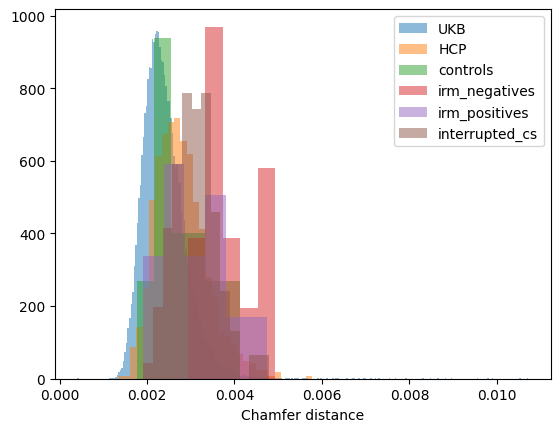

In [40]:
plt.hist(chamfer_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(chamfer_hcp, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(chamfer_control, bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(chamfer_neg, bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(chamfer_pos, bins="auto", alpha=0.5, label="irm_positives", density=True)
plt.hist(chamfer_cs, bins="auto", alpha=0.5, label="interrupted_cs", density=True)


plt.xlabel("Chamfer distance")

#plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

AUC

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
scores = np.concatenate([chamfer_UKB, chamfer_hcp])
labels = np.concatenate([np.zeros(len(chamfer_UKB)), np.ones(len(chamfer_hcp))])

auc = roc_auc_score(labels, scores)
print(f"AUC = {auc:.3f}")

AUC = 0.707


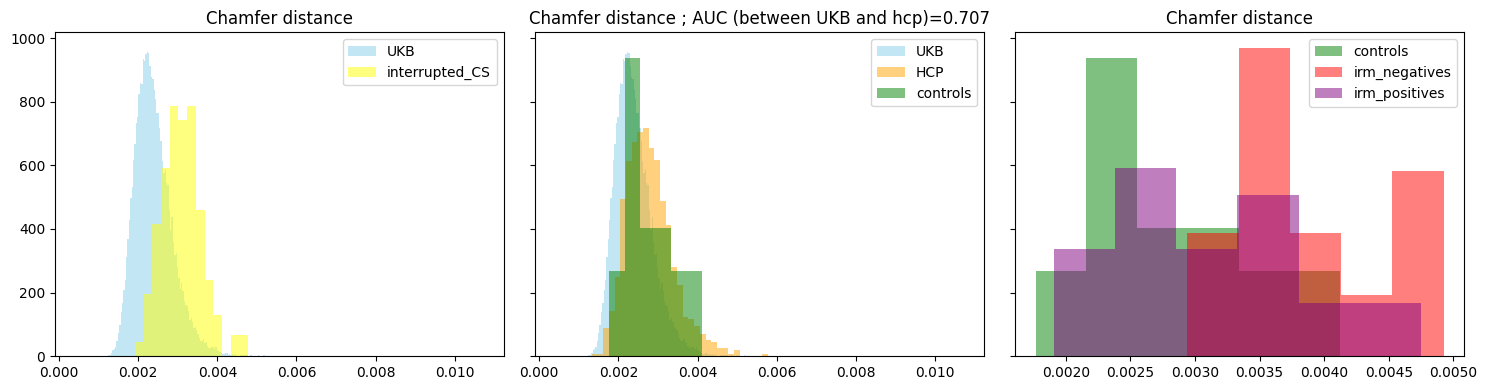

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].hist(chamfer_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[0].hist(chamfer_cs, bins="auto", alpha=0.5, label="interrupted_CS", density=True, color="yellow")
axes[0].set_title(f"Chamfer distance")
axes[0].legend()

axes[1].hist(chamfer_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[1].hist(chamfer_hcp, bins="auto", alpha=0.5, label="HCP", density=True, color="orange")
axes[1].hist(chamfer_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[1].set_title(f"Chamfer distance ; AUC (between UKB and hcp)={auc:.3f}")
axes[1].legend()

axes[2].hist(chamfer_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[2].hist(chamfer_neg, bins="auto", alpha=0.5, label="irm_negatives", density=True, color="red")
axes[2].hist(chamfer_pos, bins="auto", alpha=0.5, label="irm_positives", density=True, color="purple")
axes[2].set_title("Chamfer distance")
axes[2].legend()

#plt.title("Reconstruction error on subjects with epilepsy")
#plt.legend()
plt.tight_layout()
plt.show()

In [44]:
#The Kolmogorov-smirnov distance 
print("Between UKB and interrupted_CS:", ks_2samp(chamfer_UKB, chamfer_cs).statistic)
print("Between UKB and hcp:", ks_2samp(chamfer_UKB, chamfer_hcp).statistic)
print("Between UKB and control:", ks_2samp(chamfer_UKB, chamfer_control).statistic)
print("Between UKB and irm_neg:", ks_2samp(chamfer_UKB, chamfer_neg).statistic)
print("Between UKB and irm_pos:", ks_2samp(chamfer_UKB, chamfer_pos).statistic)
print("Between control and hcp:", ks_2samp(chamfer_control, chamfer_hcp).statistic)
print("Between control and irm_neg:", ks_2samp(chamfer_control, chamfer_neg).statistic)
print("Between control and irm_pos:", ks_2samp(chamfer_control, chamfer_pos).statistic)

Between UKB and interrupted_CS: 0.5674210357880471
Between UKB and hcp: 0.31354906907630625
Between UKB and control: 0.32091458112913607
Between UKB and irm_neg: 0.8774538684514411
Between UKB and irm_pos: 0.49116772323427516
Between control and hcp: 0.12973636964943777
Between control and irm_neg: 0.7125506072874493
Between control and irm_pos: 0.3094736842105263


In [45]:
#The Earth Mover’s Distance
print("Between UKB and interrupted_CS:", wasserstein_distance(chamfer_UKB, chamfer_cs))
print("Between UKB and hcp:", wasserstein_distance(chamfer_UKB, chamfer_hcp))
print("Between UKB and control:", wasserstein_distance(chamfer_UKB, chamfer_control))
print("Between UKB and irm_neg:", wasserstein_distance(chamfer_UKB, chamfer_neg))
print("Between UKB and irm_pos:", wasserstein_distance(chamfer_UKB, chamfer_pos))
print("Between control and hcp:", wasserstein_distance(chamfer_control, chamfer_hcp))
print("Between control and irm_neg:", wasserstein_distance(chamfer_control, chamfer_neg))
print("Between control and irm_pos:", wasserstein_distance(chamfer_control, chamfer_pos))

Between UKB and interrupted_CS: 0.0007240555029118644
Between UKB and hcp: 0.00039875147716452656
Between UKB and control: 0.00039637222202548896
Between UKB and irm_neg: 0.0014483679240490058
Between UKB and irm_pos: 0.0007033477689563314
Between control and hcp: 0.0001175824789953946
Between control and irm_neg: 0.001056795002360775
Between control and irm_pos: 0.0003482447859879353
